In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
books=pd.read_csv("books.csv")
ratings=pd.read_csv("ratings.csv")

In [15]:
books['features']=books['Title']+''+books['Author']+''+books['Genre']
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(books['features'])
content_similarity=cosine_similarity(tfidf_matrix)

In [16]:
book_index=0
similar_books=content_similarity[book_index].argsort()[::-1][1:4]
print("Content-Based Recommendations for harry Potter':")
print(books.iloc[similar_books]['Title'].tolist())

Content-Based Recommendations for harry Potter':
['Percy Jackson', 'Angels and Demons', 'The Da Vinci Code']


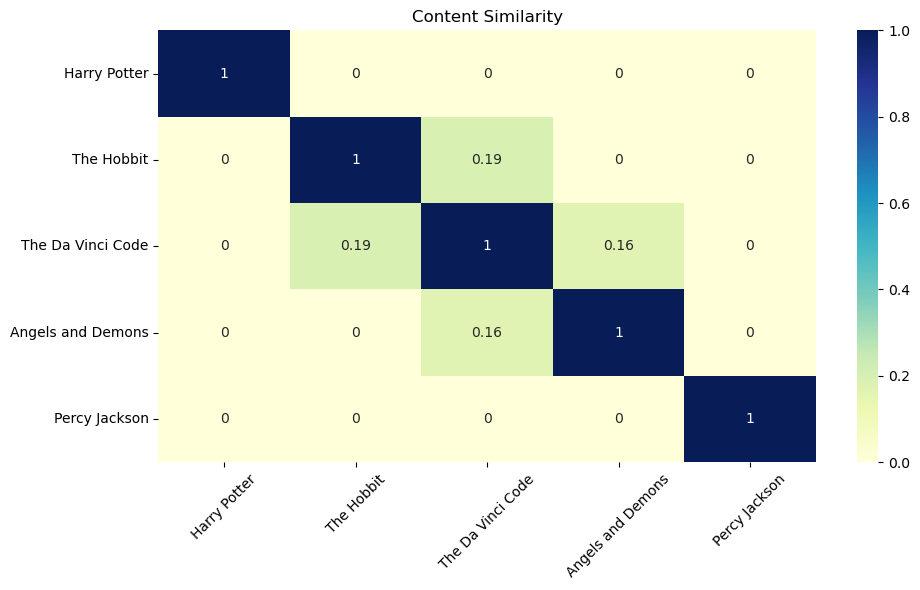

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(content_similarity, xticklabels=books['Title'],yticklabels=books['Title'],annot=True, cmap='YlGnBu')
plt.title('Content Similarity')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
user_item_matrix = ratings.pivot_table(index='User_ID',
                                       columns='Book_ID',
                                       values='Rating').fillna(0)
user_similarity = cosine_similarity(user_item_matrix)

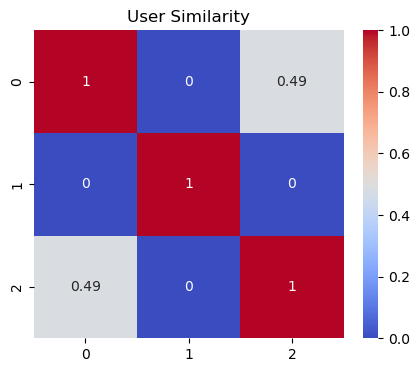

In [19]:
plt.figure(figsize=(5,4))
sns.heatmap(user_similarity,annot=True, cmap='coolwarm')
plt.title("User Similarity")
plt.show()

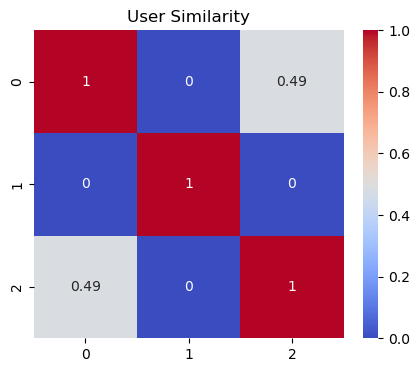

In [20]:
plt.figure(figsize=(5,4))
sns.heatmap(user_similarity,annot=True, cmap='coolwarm')
plt.title("User Similarity")
plt.show()

In [21]:
import numpy as np
user_sim_df = pd.DataFrame(user_similarity,
index=user_item_matrix.index, columns=user_item_matrix.index)
similar_users = user_sim_df[1].sort_values(ascending=False)[1:]
print("\nUsers most similar to User 1:")
print(similar_users)


Users most similar to User 1:
User_ID
3    0.487805
2    0.000000
Name: 1, dtype: float64


In [25]:
content_scores = content_similarity[book_index]
user_ratings = user_item_matrix.loc[1]
aligned_ratings = user_ratings.reindex(books['Book_ID']).fillna(0).values
hybrid_score = 0.6 * content_scores + 0.4 * aligned_ratings
top_indices = np.argsort(hybrid_score)[:: -1]
recommended_indices = [i for i in top_indices if i!= book_index][:3]
print("\nHybrid Recommendation for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())


Hybrid Recommendation for User 1:
['The Hobbit', 'Percy Jackson', 'The Da Vinci Code']


In [28]:
import streamlit as st
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

st.title("Book Recommender - Content Based")

books = pd.read_csv("books.csv")
books['features'] = books['Title'] + " " + books['Author'] + " " + books['Genre']

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(books['features'])
content_similarity = cosine_similarity(tfidf_matrix)

book_titles = books['Title'].tolist()
selected = st.selectbox("Choose a Book", book_titles)
index = books[books['Title'] == selected].index[0]

if st.button("Recommend"):
    similar_books = content_similarity[index].argsort()[::-1][1:4]
    st.write("### Recommended Books:")
    for i in similar_books:
        st.write("- " + books.iloc[i]['Title'])

SyntaxError: invalid syntax (3447677988.py, line 1)